In [215]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import folium
from folium import plugins
from folium.plugins import HeatMap

In [216]:
data = pd.read_csv("/content/drive/MyDrive/dataset/portofolio/Restaurant/restaurants.csv")
datamenu = pd.read_csv("/content/drive/MyDrive/dataset/portofolio/Restaurant/restaurant-menus.csv")

In [217]:
datamenu

restaurant_id                 category  \
0                   1        Extra Large Pizza   
1                   1        Extra Large Pizza   
2                   1        Extra Large Pizza   
3                   1        Extra Large Pizza   
4                   1        Extra Large Pizza   
...               ...                      ...   
403235           5000  "Wet Your Whistle With"   
403236           5000          Chicken Buckets   
403237           5000          Chicken Buckets   
403238           5000          Chicken Buckets   
403239           5000          Chicken Buckets   

                                       name  \
0                   Extra Large Meat Lovers   
1                       Extra Large Supreme   
2                     Extra Large Pepperoni   
3       Extra Large BBQ Chicken &amp; Bacon   
4                      Extra Large 5 Cheese   
...                                     ...   
403235                            Root Beer   
403236                Chicken Only (16 pcs)   
403237            Chicken with Meal (8 pcs)   
403238           Chicken with Meal (12 pcs)   
403239           Chicken with Meal (16 pcs)   

                                   description      price  
0                                   Whole pie.  15.99 USD  
1                                   Whole pie.  15.99 USD  
2                                   Whole pie.  14.99 USD  
3                                    Whole Pie  15.99 USD  
4                                   Whole pie.  14.99 USD  
...                                        ...        ...  
403235                                     NaN   3.95 USD  
403236                                     NaN  23.25 USD  
403237  Served with potatoes, slaw, and rolls.  18.75 USD  
403238  Served with potatoes, slaw, and rolls.  24.55 USD  
403239  Served with potatoes, slaw, and rolls.  30.25 USD  

[403240 rows x 5 columns]

In [218]:
#count menu name frequency from dataset
topmenu = datamenu['name'].value_counts()
topmenu=topmenu.to_frame().reset_index() #convert series to dataframe
topmenu.columns =['name','count']
topmenu

name  count
0                      Bottled Water    742
1                       French Fries    717
2                        Onion Rings    659
3                  Mozzarella Sticks    451
4                               Tuna    443
...                              ...    ...
100626  Snow Peas with Broccoli Dish      1
100627  Triple Mushroom Delight Dish      1
100628              Sesame Tofu Dish      1
100629       General Tso's Tofu Dish      1
100630         Chicken Only (16 pcs)      1

[100631 rows x 2 columns]

In [219]:
#create bar chart that show top 10 frequently seen menu
fig = px.bar(topmenu.head(10),y='name',x='count',color='name')
fig.update_layout(plot_bgcolor='white',title={'text':'Top Restaurants Menu','x':0.5, 'xanchor':'center','yanchor':'top'}
                  ,showlegend=False)
fig.update_traces(texttemplate='%{x}',textposition='outside')
fig.update_yaxes(title='Food Name')

as we can expect ,**water/bottled water** should be available at **most of the restaurants**.
**french fries and onion rings** become one of the **favourite menu** in USA restaurants.

In [220]:
data.head(3)

id  position                                            name  score  \
0   1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1   2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2   3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   

   ratings                                          category price_range  \
0      NaN                     Burgers, American, Sandwiches           $   
1      NaN  Coffee and Tea, Breakfast and Brunch, Bubble Tea         NaN   
2      NaN        American, Cheesesteak, Sandwiches, Alcohol           $   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   

         lng  
0 -86.830703  
1 -86.773330  
2 -86.854640

In [221]:
data.drop(['position'],axis=1,inplace=True)

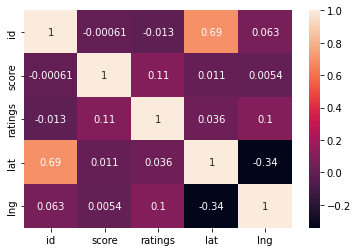

In [222]:
fig= sns.heatmap(data.corr(),annot=True)

as we can see ,all our data has little to no correlation except lat and id. frankly speaking ,there shouldnt be any correlation between lat and id ,lets check the proof below.

In [223]:
px.scatter(data,x='id' ,y='lat')

as we can see there are no trends from this scatter chart.

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   name          5000 non-null   object 
 2   score         2169 non-null   float64
 3   ratings       2169 non-null   float64
 4   category      4999 non-null   object 
 5   price_range   4419 non-null   object 
 6   full_address  4978 non-null   object 
 7   zip_code      4978 non-null   object 
 8   lat           5000 non-null   float64
 9   lng           5000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


In [225]:
data.isna().sum()

id                 0
name               0
score           2831
ratings         2831
category           1
price_range      581
full_address      22
zip_code          22
lat                0
lng                0
dtype: int64

we have a lot of missing values , but we can only manipulate "category" column.

In [226]:
#checking what data is null
data.loc[data['category'].isna()]

id                           name  score  ratings category price_range  \
978  979  Dunkin' (8171 Us Highway 431)    NaN      NaN      NaN         NaN   

                                 full_address zip_code       lat       lng  
978  8171 Highway 431, Albertville, AL, 35950    35950  34.28124 -86.21997

In [227]:
# dunkin is a breakfast restaurant ,so we can fill na with breakfast and cofee. we also could delete this row if its necessary
data['category'].fillna('Breakfast ,Coffee',inplace=True)

In [228]:
#check our price range unique column
data['price_range'].unique()

array(['$', nan, '$$', '$$$', '$$$$'], dtype=object)

In [229]:
#replace unique column in price range with text
data['price_range'].replace({'$': "Inexpensive",'$$':"Moderately expensive","$$$":"Expensive","$$$$":"Very Expensive"},inplace=True)

In [230]:
#remove any null at price range column
price_range = data['price_range']
price_range.dropna(inplace=True)

In [231]:
fig = px.pie(data,names='price_range')
fig.update_layout( title={'text':'Price Range distribution','x':0.5, 'xanchor':'center','yanchor':'top'})
fig.update_traces(textinfo='percent+label')
fig.show()

as we can see ,pie chart above tell us that **54% of our restaurants is inexpensive** , 33.8% moderately expensive , 11.6% null values , 0.24% expensive , 0.02% very expensive

In [232]:
fig= px.histogram(price_range,color=price_range)
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'Price Range distribution','x':0.5, 'xanchor':'center','yanchor':'top'}
                  ,showlegend=False)
fig.update_xaxes(title='Price range')
fig.show()

there are 2176 inexpensive restaurants , 1690 moderately expensives , 12 expensives and 1 very expensive restaurant.

In [233]:
# each zip code can contain more than 1 area , so we try to combine those area together.
zip_code_data = data['zip_code'].value_counts().sort_values(ascending=False)
zip_code_data.dropna(inplace=True)
zip_code_data = zip_code_data.to_frame()

In [234]:
zip_code_data= zip_code_data.reset_index()

In [235]:
zip_code_data.columns = ['zip_code','count']

In [236]:
zip_code_data.head(2)

zip_code  count
0    53202    121
1    53704     72

In [ ]:
!pip install uszipcode

In [238]:
#us zip code library allow us to get city name just from zip code
from uszipcode import SearchEngine
engine = SearchEngine()

In [239]:
#remove any zip code that contains dash
zip_code_data = zip_code_data[zip_code_data["zip_code"].str.contains("-")==False]

In [ ]:
# we found that zip code 43889 is an outlier ,so lets remove it.
zip_code_data.drop(zip_code_data.loc[zip_code_data['zip_code']=='43889'].index,inplace=True)

In [ ]:
# we found there are 2 strings in our zip code column ,lets remove it.
zip_code_data.drop(zip_code_data.loc[zip_code_data['zip_code']=='United States'].index,inplace=True)                   
zip_code_data.drop(zip_code_data.loc[zip_code_data['zip_code']=='Milwaukee'].index,inplace=True)

In [242]:
zip_code_data.reset_index(drop=True,inplace=True)
zip_code_data.head(2)

zip_code  count
0    53202    121
1    53704     72

we succeed in appending city names

In [243]:
# by using uszipcode library we can retrieve city names and append it to new series .
rows = []

for i in zip_code_data['zip_code']:
    zipcode = engine.by_zipcode(i)
    rows.append([zipcode.major_city])

print(rows)

Exception ignored in: <function SearchEngine.__del__ at 0x7f24d88f7c20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1793, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1835, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2335, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2558, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2544, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2536, in _connection_rollback_impl
  File "/usr/lo

[['Milwaukee'], ['Madison'], ['Madison'], ['Birmingham'], ['Dothan'], ['Green Bay'], ['Milwaukee'], ['Brookfield'], ['Milwaukee'], ['Milwaukee'], ['Kenosha'], ['Madison'], ['Huntsville'], ['Milwaukee'], ['Birmingham'], ['Sheboygan'], ['Oak Creek'], ['Janesville'], ['Milwaukee'], ['Wausau'], ['Milwaukee'], ['Gulf Shores'], ['Milwaukee'], ['Racine'], ['Milwaukee'], ['Milwaukee'], ['Middleton'], ['Birmingham'], ['Sun Prairie'], ['Foley'], ['Milwaukee'], ['Wisconsin Dells'], ['Casper'], ['New Berlin'], ['Brookfield'], ['Milwaukee'], ['Alabaster'], ['Cheyenne'], ['Madison'], ['Oconomowoc'], ['Cheyenne'], ['West Bend'], ['Milwaukee'], ['Onalaska'], ['Madison'], ['Hartselle'], ['Waukesha'], ['Green Bay'], ['Madison'], ['Appleton'], ['Birmingham'], ['Appleton'], ['Pewaukee'], ['Huntsville'], ['Oshkosh'], ['Menomonee Falls'], ['Appleton'], ['Madison'], ['Milwaukee'], ['Milwaukee'], ['Milwaukee'], ['Waukesha'], ['Jackson'], ['Milwaukee'], ['Fond Du Lac'], ['Pelham'], ['Green Bay'], ['Birmingham'

In [244]:
df = pd.DataFrame(rows, columns=["City"])

In [245]:
zip_code_data['city'] = df['City']

In [246]:
zip_code_data.head(5)

zip_code  count        city
0    53202    121   Milwaukee
1    53704     72     Madison
2    53703     71     Madison
3    35244     70  Birmingham
4    36303     68      Dothan

we succeed in getting city names for each zip code

In [247]:

fig= px.histogram(zip_code_data.head(25),x='city',y='count',color='city')

fig.update_layout(plot_bgcolor='white',
                  title={'text':'Price Range distribution','x':0.5, 'xanchor':'center','yanchor':'top'}
                  ,showlegend=False)
fig.show()

most restaurant located at milwaukee ,madison and birmingham , the rest of the restaurants count in a location ranging between 0-100

In [248]:
data.head(5)

id                                            name  score  ratings  \
0   1               PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
1   2                  J' ti`'z Smoothie-N-Coffee Bar    NaN      NaN   
2   3  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN      NaN   
3   4         Papa Murphy's (1580 Montgomery Highway)    NaN      NaN   
4   5                Nelson Brothers Cafe (17th St N)    4.7     22.0   

                                           category  price_range  \
0                     Burgers, American, Sandwiches  Inexpensive   
1  Coffee and Tea, Breakfast and Brunch, Bubble Tea          NaN   
2        American, Cheesesteak, Sandwiches, Alcohol  Inexpensive   
3                                             Pizza  Inexpensive   
4         Breakfast and Brunch, Burgers, Sandwiches          NaN   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3         1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4               314 17th St N, Birmingham, AL, 35203    35203  33.514730   

         lng  
0 -86.830703  
1 -86.773330  
2 -86.854640  
3 -86.806614  
4 -86.811700

In [249]:
resto_score = data.copy()
resto_score.dropna(inplace=True)

In [250]:
resto_score.isna().sum()

id              0
name            0
score           0
ratings         0
category        0
price_range     0
full_address    0
zip_code        0
lat             0
lng             0
dtype: int64

In [251]:
#lets make a new rating . lots of reviews with good scores means better ratings than few reviews but good scores.
resto_score['weighted_rating'] = resto_score['score'] * resto_score['ratings']

In [252]:
resto_score = resto_score.sort_values(by='weighted_rating',ascending=False)

In [253]:
resto_score.reset_index(drop=True,inplace=True)

In [254]:
data.head(4)

id                                            name  score  ratings  \
0   1               PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
1   2                  J' ti`'z Smoothie-N-Coffee Bar    NaN      NaN   
2   3  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN      NaN   
3   4         Papa Murphy's (1580 Montgomery Highway)    NaN      NaN   

                                           category  price_range  \
0                     Burgers, American, Sandwiches  Inexpensive   
1  Coffee and Tea, Breakfast and Brunch, Bubble Tea          NaN   
2        American, Cheesesteak, Sandwiches, Alcohol  Inexpensive   
3                                             Pizza  Inexpensive   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3         1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   

         lng  
0 -86.830703  
1 -86.773330  
2 -86.854640  
3 -86.806614

In [255]:
#lets see restaurants at milwaukee
milwaukee = data.loc[data['zip_code']=='53202']

In [ ]:
milwaukee.dropna(subset=['price_range'],inplace=True)

In [257]:
milwaukee.isna().sum()

id               0
name             0
score           32
ratings         32
category         0
price_range      0
full_address     0
zip_code         0
lat              0
lng              0
dtype: int64

In [258]:
fig= px.histogram(milwaukee ,x ='price_range',color='price_range')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'milwaukee restaurant distribution ','x':0.5, 'xanchor':'center','yanchor':'top'}
                  ,showlegend=False)
fig.update_xaxes(title='Price range')
fig.update_layout(showlegend=False)

In [ ]:
#lets check restaurants at madison
madison = data.loc[data['zip_code']=='53704']
madison.dropna(subset=['price_range'],inplace=True)

In [260]:
px.histogram(madison ,x ='price_range')
fig.update_traces(texttemplate='%{y}',textposition='outside')
fig.update_layout(plot_bgcolor='white',
                  title={'text':'Madison restaurant distribution ','x':0.5, 'xanchor':'center','yanchor':'top'}
                  ,showlegend=False)
fig.update_xaxes(title='Price range')

In [261]:
map = data.copy()

In [262]:
map.dropna(subset=['full_address'],inplace=True)

In [263]:
#remove outlier and null values
map = map[(map.lat.notnull())]
map = map[(map.lat != -1) & (map.lng != -1)]
map = map[~map.lat.isna()]

In [264]:
places = []

map_offenses = folium.Map(location=[37.09024,-95.712891], zoom_start=4.3)
for i, loc in map.iterrows():
    places.append((loc['lat'], loc['lng']))

In [265]:
map_offenses.add_child(plugins.HeatMap(places, radius=18))

In [266]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(map)):
   folium.Marker(
      location=[map.iloc[i]['lat'], map.iloc[i]['lng']],
      popup=map.iloc[i]['full_address'],
   ).add_to(m)

# Show the map again
m

In [267]:
#creat best resto series based on our weighted rating.
best_resto=resto_score.loc[(resto_score['weighted_rating'] > 899)]['full_address'].value_counts()
best_resto

544 E Ogden Ave, Milwaukee, WI, 53202                                      2
8235 West Bluemound Road, Wauwatosa, WI, 53213                             1
1247 N Water St, Milwaukee, WI, 53202                                      1
2713 N Bremen St, Milwaukee, WI, 53212                                     1
1434 E Brady St, Milwaukee, WI, 53202                                      1
12625 W Capitol Dr, Brookfield, WI, 53005                                  1
600 East Ogden Avenue, Milwaukee, WI, 53202                                1
3101 N. Oakland Ave, Milwaukee, WI, 53211                                  1
2921 N Oakland Ave, Milwaukee, WI, 53211                                   1
2045 E North Ave, Milwaukee, WI, 53202                                     1
1421 E Howard Ave, Milwaukee, WI, 53207                                    1
1624 W Wells St, Milwaukee, WI, 53233                                      1
5650 N.Port Washington Rd. Suite 150, Glendale, WI, 53217                  1

In [268]:
resto_score

id                                     name  score  ratings  \
0     2370         Starbucks (84th &amp; Bluemound)    4.9    200.0   
1     2311         Starbucks (Webster &amp; Downer)    4.8    200.0   
2     1960                              Fusion Poke    4.8    200.0   
3     4817                 Everyday Needs by Gopuff    4.8    200.0   
4     1824                        Kyoto (Milwaukee)    4.8    200.0   
...    ...                                      ...    ...      ...   
1893   605          Checkers (3107 Montgomery Hwy.)    3.8     10.0   
1894  3569                     La Mesa (Brookfield)    3.1     12.0   
1895  3616         Twisted Tenders (327 S Lake Ave)    3.4     10.0   
1896  4578               Dunkin' (735 W Johnson St)    3.3     10.0   
1897  3532  MrBeast Burger (N116W15841 Main Street)    3.0     10.0   

                                               category           price_range  \
0     Bakery, Breakfast and Brunch, Cafe, Coffee &am...           Inexpensive   
1     Bakery, Breakfast and Brunch, Cafe, Coffee &am...           Inexpensive   
2                            Asian, Seafood, Rice-bowls           Inexpensive   
3     Everyday Essentials, Convenience, Grocery, Snacks           Inexpensive   
4         Japanese, Asian, Sushi, Family Friendly, Thai           Inexpensive   
...                                                 ...                   ...   
1893                     American, burger, Family Meals           Inexpensive   
1894                    Mexican, Desserts, Family Meals           Inexpensive   
1895  Chicken, Wings, Sandwiches, Comfort Food, Fami...  Moderately expensive   
1896                       Breakfast and Brunch, Donuts           Inexpensive   
1897                                 American, Desserts           Inexpensive   

                                        full_address zip_code        lat  \
0     8235 West Bluemound Road, Wauwatosa, WI, 53213    53213  43.035652   
1           2551 N. Downer Ave, Milwaukee, WI, 53211    53211  43.065046   
2         1813 E Kenilworth Pl, Milwaukee, WI, 53202    53202  43.059845   
3          2037 N Farwell Ave., Milwaukee, WI, 53202    53202   0.000000   
4           7453 W Layton Ave, Greenfield, WI, 53220    53220  42.958697   
...                                              ...      ...        ...   
1893         3107 Montgomery Hwy., Dothan, AL, 36303    36303  31.251466   
1894          3845 N 124th St, Brookfield, WI, 53005    53005  43.086757   
1895               327 S LAKE AVE, DULUTH, MN, 55802    55802  46.783410   
1896        735 W Johnson St, Fond du Lac, WI, 54935    54935  43.784740   
1897   N116W15841 Main Street, Germantown, WI, 53022    53022  43.227910   

            lng  weighted_rating  
0    -88.015850            980.0  
1    -87.878318            960.0  
2    -87.887627            960.0  
3      0.000000            960.0  
4    -88.007013            960.0  
...         ...              ...  
1893 -85.427859             38.0  
1894 -88.067268             37.2  
1895 -92.096110             34.0  
1896 -88.474100             33.0  
1897 -88.106040             30.0  

[1898 rows x 11 columns]

In [269]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4.2)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(best_resto)):
   folium.Marker(
      location=[map.iloc[i]['lat'], map.iloc[i]['lng']],
      popup=map.iloc[i]['full_address'],
       icon=folium.Icon(color="red", icon="glyphicon-cutlery"),
   ).add_to(m)

# Show the map again
m

Birmingham got many resturants with good rating and reviewer count above 200

# Summary


*   Bottled water, French fries, and onion rings are the most common menu items at many restaurants.
*   54% of USA restaurants has inexpensive price range
* Milwaukee has the most number of restaurants in the USA
* The best restaurants (lots of reviews and high scores) are located in Birmingham.



